## Importing and Understanding the Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
file = 'laptops.csv'

In [6]:
df = pd.read_csv(file)

In [7]:
df = pd.read_csv(file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [8]:
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = headers
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


In [9]:
df = df.replace('?',np.nan)

In [10]:
df.dtypes

Manufacturer         object
Category              int64
Screen               object
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch     object
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_kg            object
Price                 int64
dtype: object

In [11]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234,238.000000,238.000000,238.000000,233,238.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,NaN,2.360084,7.882353,245.781513,NaN,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,NaN,0.411393,2.482603,34.765316,NaN,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


In [12]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


## Data wrangling

In [13]:
df = pd.read_csv('laptops_wrangling.csv', header=0)

In [14]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [15]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Evaluate the dataset for missing data

In [16]:
#create a df with missing values (true or false). Loop for each column print the number of missing values
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

### Replace with mean

In [17]:
weight_kg_mean = df['Weight_kg'].mean()
print(weight_kg_mean)

df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())
df.head()

1.8622317596566522


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Replace with the most frequent value

In [18]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"] = df["Screen_Size_cm"].replace(np.nan, common_screen_size)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Fixing the data types

In [19]:
df.Weight_kg = df.Weight_kg.astype('float')
df.Screen_Size_cm = df.Screen_Size_cm.astype('float')

df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

### Data Standardization

In [20]:
df['Weight_kg'] = df['Weight_kg'] * 2.205
df.rename(columns={"Weight_kg": "Weight_pounds"}, inplace=True)

df['Screen_Size_cm'] = df['Screen_Size_cm'] / 2.54
df.rename(columns={"Screen_Size_cm": "Screen_Size_inch"}, inplace=True)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


### Data Normalization


In [21]:
#Simple Featue Scaling
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

### Binning

In [22]:
bins = np.linspace(min(df['Price']),max(df['Price']),4)
attributes = ['Low','Medium','High']
df['Price-binned'] = pd.cut(df['Price'],bins,labels=attributes, include_lowest=True)

Text(0.5, 1.0, 'Price bins')

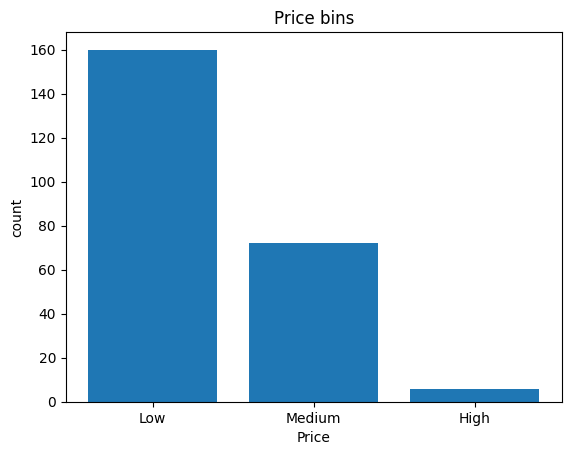

In [23]:
plt.bar(attributes, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

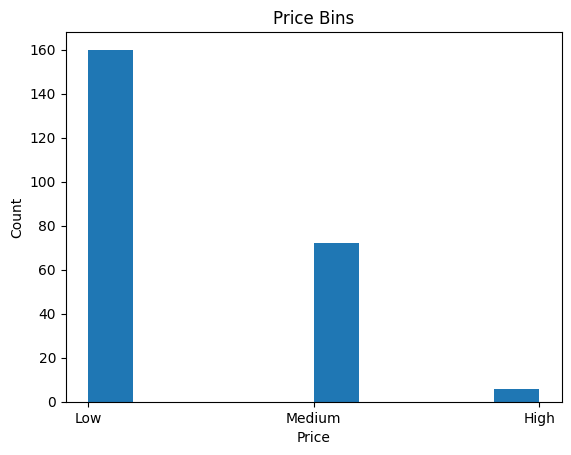

In [24]:
plt.hist(df['Price-binned'], histtype='bar', rwidth=50)  # Histogram for price-binned

# Adding titles and labels
plt.title('Price Bins')  # Title of the plot
plt.xlabel('Price')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Show the plot
plt.show()

In [25]:
# Write your code below and press Shift+Enter to execute

#we create the categories with pandas dummies
dummy_screen = pd.get_dummies(df['Screen'])

#we rename the categorie columns directly in the dataframe
df.rename(columns={'Screen-IPS_panel':'Screen-IPS_panel','Screeb-Full_HD':'Screen-Full_HD'},inplace=True)

#we add the columns in the dataframe
df = pd.concat([df,dummy_screen],axis=1)

#we remove the screen column
df.drop("Screen",axis=1,inplace=True)

In [26]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


# Exploratory Data Analysis

In [27]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


Check the correlation between some features and price to check if there is a weak or strong relationship

<Axes: xlabel='CPU_frequency', ylabel='Price'>

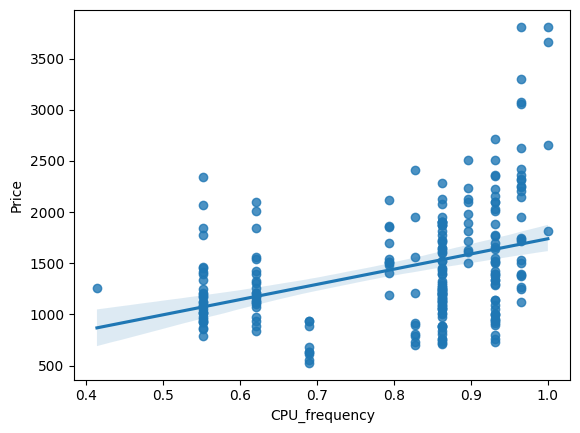

In [28]:
sns.regplot(x='CPU_frequency', y='Price', data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

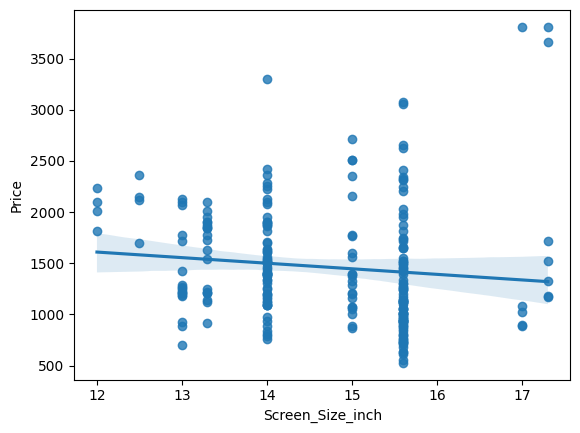

In [29]:
sns.regplot(x='Screen_Size_inch', y='Price', data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

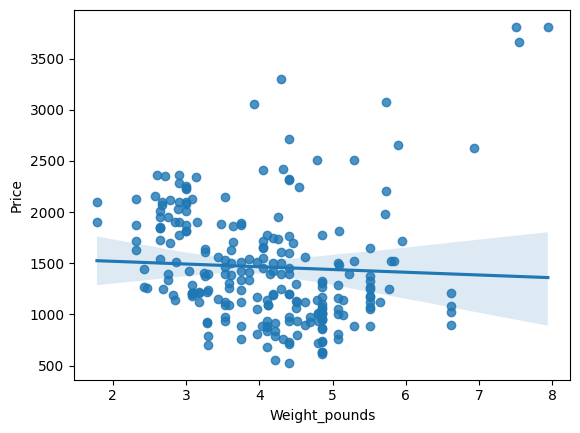

In [30]:
sns.regplot(x='Weight_pounds', y='Price', data=df)

Now we want to check the values of the three attributes with Price

In [31]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"{df[[param,"Price"]].corr()}\n")

               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000

                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000

               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000



Let's check the categorical features correlation with Price using boxplots

<Axes: xlabel='Category', ylabel='Price'>

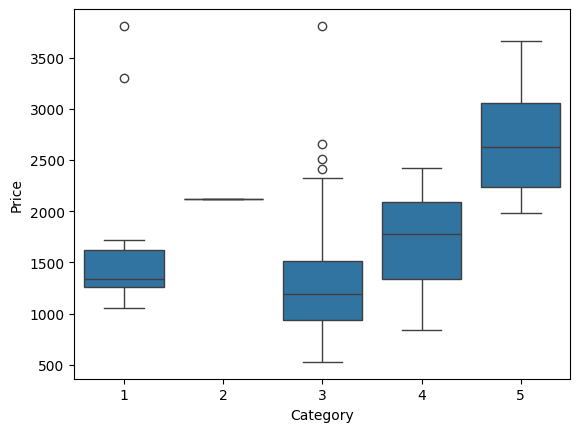

In [32]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

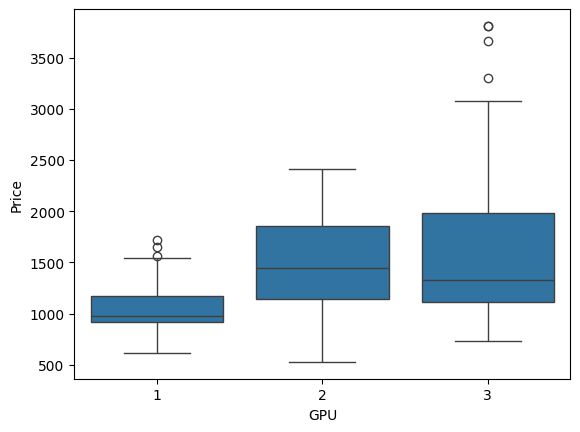

In [33]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

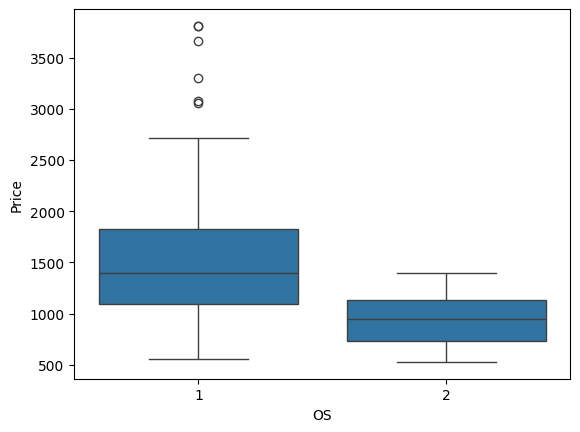

In [34]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

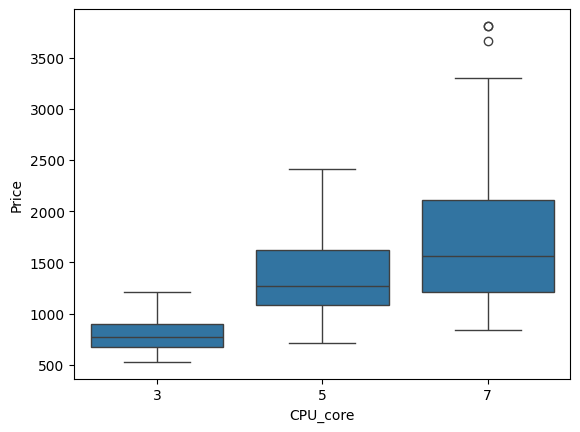

In [35]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

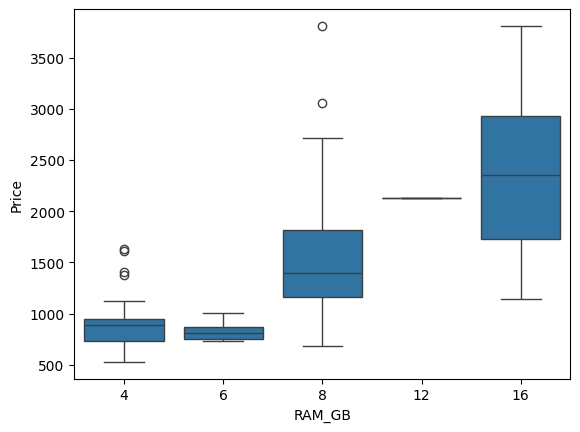

In [36]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

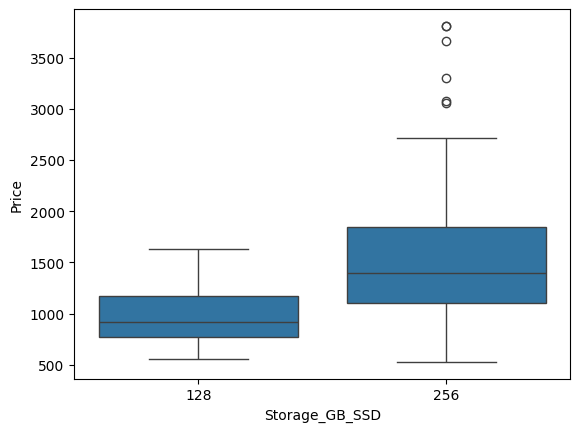

In [37]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [51]:
df['Price-binned'] = df['Price-binned'].astype('object')

In [52]:
df.describe(include='object')

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


Now we are gonna group the parameters "GPU", "CPU-core" and Price to visualize the connection using a pcolor plot

In [53]:
df_pivot_group = df[['GPU','CPU_core','Price']]
df_grp = df_pivot_group.groupby(['GPU','CPU_core'], as_index=False).mean()
df_grp

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [55]:
#creating the pivot table

df_pivot = df_grp.pivot(index='GPU',columns='CPU_core')
df_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

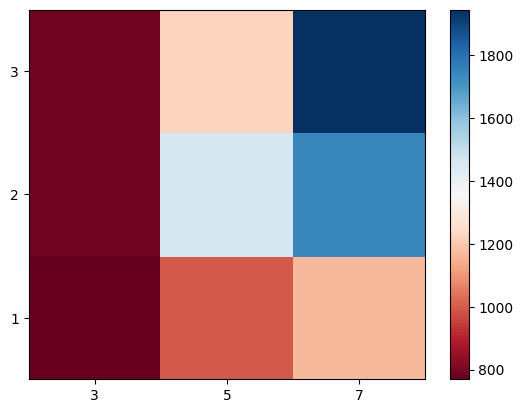

In [57]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

Now let's use Pearson Correlation and discover the coefficient and p-value for each parameters we tested to check the if there's a strong effect on the price or not

In [59]:
# Write your code below and press Shift+Enter to execute
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(f"The Pearson Correlation Coefficient for \033[1m{param}\033[0m and 'Price' is {pearson_coef} with a P-Value of P = {p_value}\n")

The Pearson Correlation Coefficient for RAM_GB and 'Price' is 0.5492972971857841 with a P-Value of P = 3.681560628842973e-20

The Pearson Correlation Coefficient for CPU_frequency and 'Price' is 0.36666555892588604 with a P-Value of P = 5.502463350713339e-09

The Pearson Correlation Coefficient for Storage_GB_SSD and 'Price' is 0.24342075521810302 with a P-Value of P = 0.00014898923191723976

The Pearson Correlation Coefficient for Screen_Size_inch and 'Price' is -0.11056471275425056 with a P-Value of P = 0.08876456732700826

The Pearson Correlation Coefficient for Weight_pounds and 'Price' is -0.050312258377515476 with a P-Value of P = 0.43976938534338894

The Pearson Correlation Coefficient for CPU_core and 'Price' is 0.4593977773355115 with a P-Value of P = 7.912950127009359e-14

The Pearson Correlation Coefficient for OS and 'Price' is -0.22172980114827384 with a P-Value of P = 0.000569664255924674

The Pearson Correlation Coefficient for GPU and 'Price' is 0.28829819888814273 with